<span style="color:red; font-size:24px; font-weight:bold;">Case Study </span>


### `Question : `

#### This section focuses on building a regression model to forecast carbon emissions in the US usingrelevant macroeconomic variables. You will need to explore data, perform EDA, specify models, and validate results.

## Import all libraries

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import r2_score 
import scipy.stats as stats 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

## Read data

In [162]:
df=pd.read_excel("case_study-co2.xlsx")

In [172]:
df.head()

,Year,Co2,GDP,Energy per capita
0,1975,4428,7801.456664,91442.539
1,1976,4695,8592.253537,95543.227
2,1977,4835,9452.576519,96991.727
3,1978,4884,10564.948222,98031.711
4,1979,4950,11674.181867,97904.820


# `Data Description`

This dataset contains information about CO2 emissions, GDP, and energy consumption per capita for a given period from 1975 to 2023. The data consists of the following columns:



### Data Summary:
- **Years**: From 1975 to 2023.
- **CO2 emissions**: This represents the emission of carbon dioxide, which is linked to the environmental impact and industrial activities in each year.
- **GDP**: The economic output measured each year, adjusted for inflation to provide a real value.
- **Energy per capita**: The average energy consumption per person, indicating the energy efficiency or consumption trends per capita over the years.

This dataset can be used for various analyses, including examining the relationship between CO2 emissions and GDP, energy consumption trends, and investigating the environmental impacts relative to economic growth over time.


## Initial Visualization of all the 3 variables over time

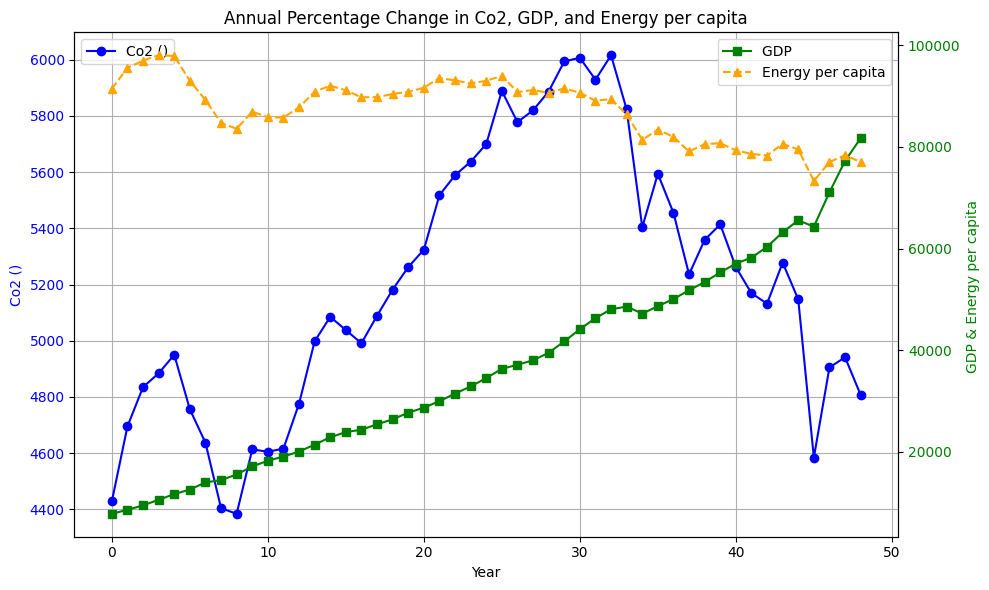

In [166]:
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Co2 percentage change on the left y-axis
ax1.plot(df.index, df["Co2"], label="Co2 ()", marker="o", color="blue")
ax1.set_xlabel("Year")
ax1.set_ylabel("Co2 ()", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.grid(True)

# Create a second y-axis for GDP and Environment percentage change
ax2 = ax1.twinx()  # Share the same x-axis
ax2.plot(df.index, df["GDP"], label="GDP ", marker="s", color="green")
ax2.plot(df.index, df["Energy per capita"], label="Energy per capita", marker="^", linestyle="--", color="orange")
ax2.set_ylabel("GDP & Energy per capita ", color="green")
ax2.tick_params(axis='y', labelcolor="green")

# Add a title
plt.title("Annual Percentage Change in Co2, GDP, and Energy per capita")

# Add legends for both axes
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Adjust layout and show the plot
fig.tight_layout()
plt.show()


## ADF test on GDP (annual percentage change)

In [77]:
from statsmodels.tsa.stattools import adfuller

# Calculate percentage change and drop NaN values
df_pct_change = df.set_index("Year ").pct_change() * 100
df_pct_change = df_pct_change.dropna()  

# Perform the ADF test on the GDP column
adf_test = adfuller(df_pct_change["GDP"])

# Display the results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])


ADF Statistic: -4.071416748961261
p-value: 0.0010794236240894276
Critical Values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}


## ADF test on Co2 (annual percentage change)

In [167]:

# Perform the ADF test on the GDP column
adf_test = adfuller(df_pct_change["Co2"])

# Display the results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])


ADF Statistic: -5.436990154822024
p-value: 2.831103510197403e-06
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}


## ADF test on Energy per capita (annual percentage change)

In [168]:

# Perform the ADF test on the GDP column
adf_test = adfuller(df_pct_change["Energy per capita"])

# Display the results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])


ADF Statistic: -5.196339625292281
p-value: 8.944635454906473e-06
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}


## Correlation Analysis

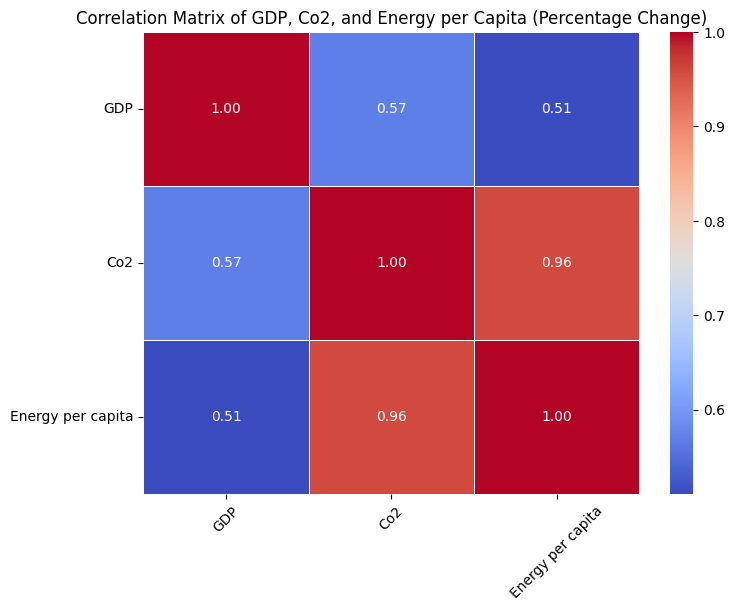

In [169]:


# Compute the correlation matrix for the percentage changes of the selected variables
correlation_matrix = df_pct_change[["GDP", "Co2", "Energy per capita"]].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add labels and a title
plt.title("Correlation Matrix of GDP, Co2, and Energy per Capita (Percentage Change)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


## VIF testing

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select the columns for GDP and Energy per capita
X = df_pct_change[["GDP", "Energy per capita"]]

# Add a constant (intercept) term to the predictors
X_with_const = add_constant(X)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIF values
print(vif)


            Variable       VIF
0              const  4.983624
1                GDP  1.352653
2  Energy per capita  1.352653


#### ``The VIF values indicate that there is no significant multicollinearity between GDP and Energy per capita. Both variables have VIF values below 5, suggesting that they can be included in the model without concerns about multicollinearity.``

## Scatterplot of the Level Series independent variables vs dependent variables

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(df["GDP"], df["Co2"], color="blue", alpha=0.7)
axes[0].set_title("Co2 vs GDP (Percentage Change)")
axes[0].set_xlabel("GDP (% Change)")
axes[0].set_ylabel("Co2 (% Change)")

axes[1].scatter(df["Energy per capita"], df["Co2"], color="green", alpha=0.7)
axes[1].set_title("Co2 vs Energy per Capita (Percentage Change)")
axes[1].set_xlabel("Energy per Capita (% Change)")
axes[1].set_ylabel("Co2 (% Change)")

plt.tight_layout()
plt.show()


## Scatterplot of the differenced independent variables and dependent variables 

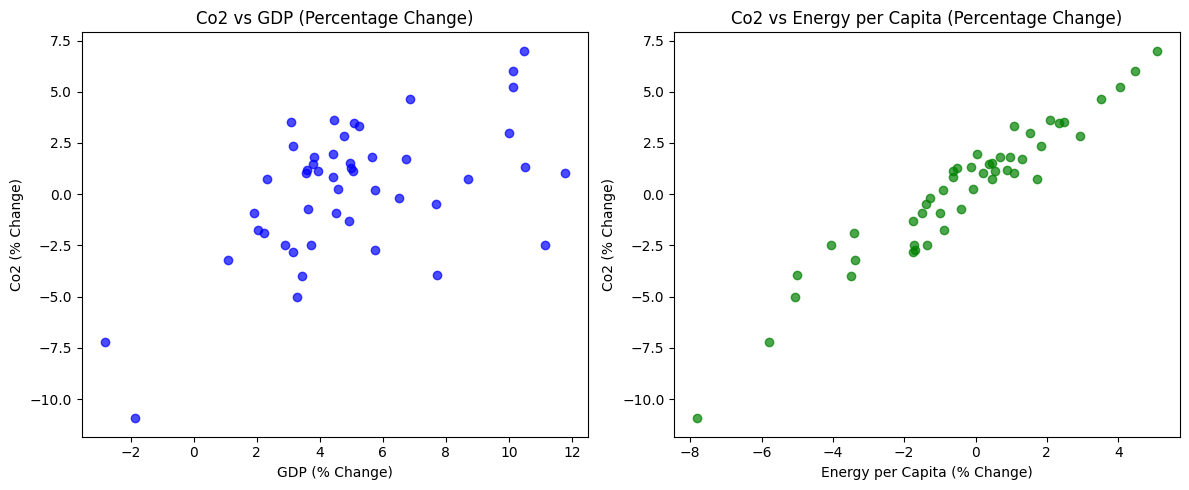

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(df_pct_change["GDP"], df_pct_change["Co2"], color="blue", alpha=0.7)
axes[0].set_title("Co2 vs GDP (Percentage Change)")
axes[0].set_xlabel("GDP (% Change)")
axes[0].set_ylabel("Co2 (% Change)")

axes[1].scatter(df_pct_change["Energy per capita"], df_pct_change["Co2"], color="green", alpha=0.7)
axes[1].set_title("Co2 vs Energy per Capita (Percentage Change)")
axes[1].set_xlabel("Energy per Capita (% Change)")
axes[1].set_ylabel("Co2 (% Change)")

plt.tight_layout()
plt.show()


## `Understanding relationship between Co2 and GDP`

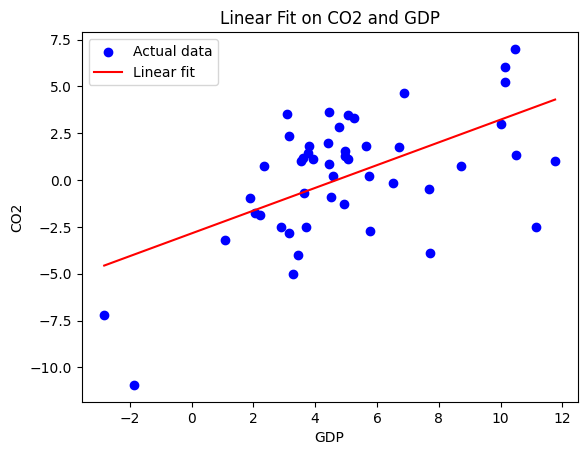

Intercept: -2.8461552269213493
Coefficient: [0.60719344]
R-squared value is : 0.3226398180552471
RMSE: 2.6974027930295517


In [178]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

import matplotlib.pyplot as plt
import numpy as np
X = df_pct_change[['GDP']].values  
y = df_pct_change['Co2'].values  

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)


plt.scatter(df_pct_change.GDP, df_pct_change.Co2, color='blue', label='Actual data')

X = df_pct_change.GDP.values.reshape(-1, 1)
y_pred = lr.predict(X)

plt.plot(df_pct_change.GDP, y_pred, color='red', label='Linear fit')

plt.xlabel('GDP')
plt.ylabel('CO2')
plt.title('Linear Fit on CO2 and GDP')
plt.legend()

plt.show()

print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

print("R-squared value is :",lr.score(X,y))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))


### Interpreting the linear regression model of Co2 (APC) on GDP (APC)


- **Intercept (-2.85)**: This represents the estimated value of CO2 emissions (as a percentage change) when GDP (as a percentage change) is zero. In this case, the negative intercept implies that if there is no change in GDP, the CO2 emissions would decrease by approximately 2.85% annually.

- **Coefficient (0.61)**: The coefficient of 0.61 indicates that for every 1% increase in GDP, the CO2 emissions (as a percentage change) are expected to increase by 0.61%. This suggests a positive relationship between GDP and CO2 emissions, meaning as the economy grows (in percentage terms), CO2 emissions tend to rise as well.

- **R-squared (0.32)**: The R-squared value of 0.32 indicates that approximately 32% of the variability in CO2 emissions can be explained by changes in GDP. This suggests that the model is not very strong, as a large proportion of the variance is unexplained by the relationship between GDP and CO2 emissions.

- **RMSE (2.70)**: The RMSE value of 2.70 indicates the average difference between the actual and predicted percentage changes in CO2 emissions. On average, the model's predictions are off by about 2.7 percentage points from the actual data. A lower RMSE would indicate a better fit, but this value suggests that the model's predictions might not be very precise.



# `Understanding quadratic relationship between GDP and Co2 (APC values) `

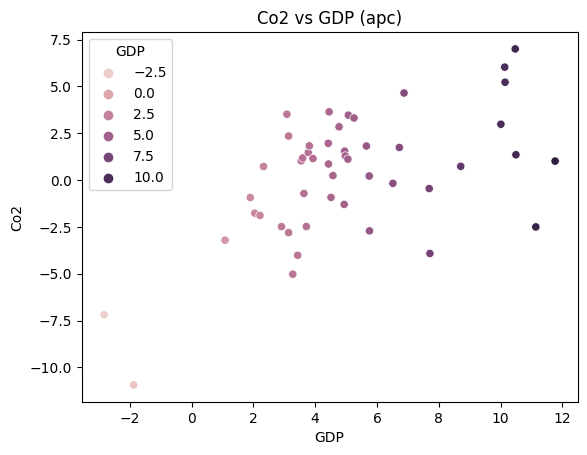

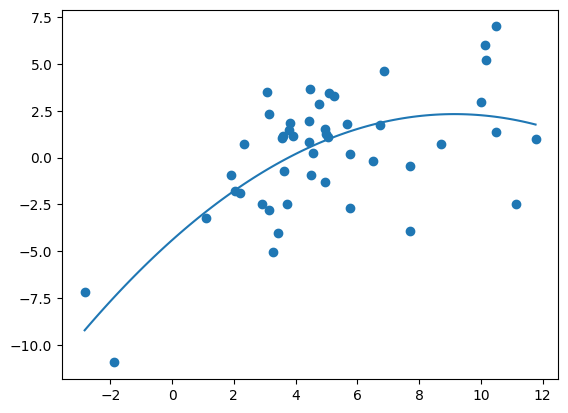

          2
-0.08058 x + 1.473 x - 4.405
Rsquared value :  0.4460992740701597


In [183]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import r2_score 
import scipy.stats as stats 
df_pct_change.dropna(inplace=True)
sns.scatterplot(data=df_pct_change, x='GDP', y='Co2', hue='GDP') 

plt.title('Co2 vs GDP (apc)') 
plt.xlabel('GDP') 
plt.ylabel('Co2') 
plt.show() 

# degree 2 polynomial fit or quadratic fit 
model = np.poly1d(np.polyfit(df_pct_change['GDP'], df_pct_change['Co2'], 2)) 

# polynomial line visualization 
polyline = np.linspace(df_pct_change['GDP'].min(), df_pct_change['GDP'].max(), 100)
plt.scatter(df_pct_change['GDP'], df_pct_change['Co2']) 
plt.plot(polyline, model(polyline)) 
plt.show() 

print(model) 

# r square metric 
print("Rsquared value : ",r2_score(df_pct_change['Co2'], model(df_pct_change['GDP']))) 


### Interpreting the Quadratic Regression Model of CO2 (APC) on GDP (APC):

The quadratic regression model is:

 ### `CO2 = -0.08058x^2 + 1.473x - 4.405` 



Where:
- **GDP** (denoted as **x**) is the independent variable, representing the annual percentage change in GDP.
  
The terms in the equation indicate:
- **\(-0.08058  x^2\)**: This quadratic term suggests a **concave relationship** between GDP and CO2 emissions. The negative coefficient indicates that as GDP increases, the impact on CO2 emissions diminishes at a decreasing rate. In other words, after a certain point, further increases in GDP have a smaller effect on CO2 emissions.
  
- **\(1.473  x\)**: The linear term represents a **direct relationship** between GDP and CO2 emissions at lower levels of GDP. A positive coefficient suggests that, in the initial phase, as GDP increases, CO2 emissions will also increase.

- **\(-4.405\)**: This is the intercept. It means that when GDP is zero, the model predicts CO2 emissions to be **-4.405**. While this might not have a practical interpretation, as GDP cannot realistically be zero, it is part of the model structure.

The **\( R^2 \) value of 0.4461** means that about **44.61%** of the variance in CO2 emissions can be explained by changes in GDP. This indicates a **moderate fit** of the model. The remaining **55.39%** of the variability in CO2 emissions is due to factors not captured in the model, suggesting that other variables might influence CO2 emissions beyond just GDP.

 ### **`Better than the linear model`**

# MLR

In [186]:
from sklearn.linear_model import LinearRegression

# Features: GDP and energy consumption
X = df_pct_change[['GDP','Energy per capita']].values  
y = df_pct_change['Co2'].values  # Target variable: CO2 emissions

# Create and train the linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Generate predictions
y_pred = lr.predict(X)


# Print model parameters
print("Intercept:", lr.intercept_)
print("Coefficients (GDP, EnergyConsumption):", lr.coef_)

# R-squared score
print("R-squared score:", lr.score(X, y))


Intercept: 0.01568424026204715
Coefficients (GDP, EnergyConsumption): [0.11348182 1.13054219]
R-squared score: 0.9275117251942431


## Residual Analysis

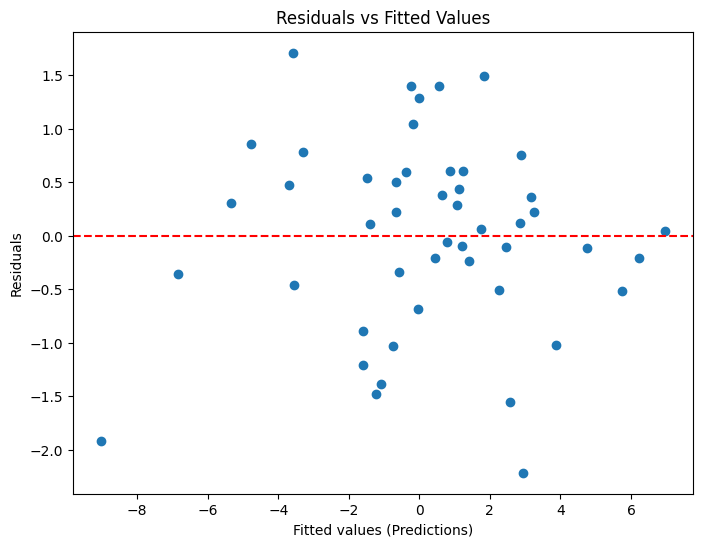

Breusch-Pagan test p-value: 0.26735026257052924
Durbin-Watson statistic: 2.0136605665655414


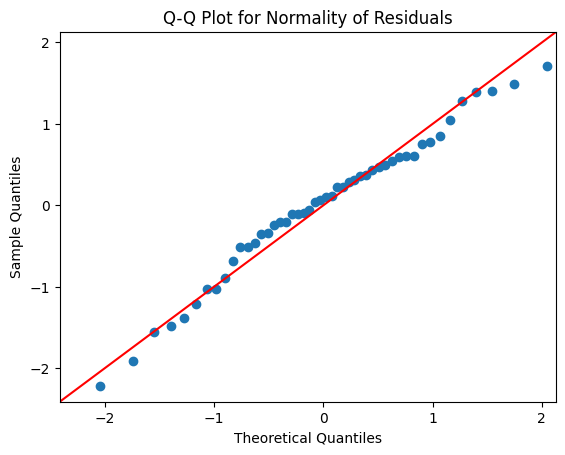

Shapiro-Wilk test p-value: 0.5136030316352844
ADF test statistic: -6.786663831880545
ADF p-value: 2.4224225194213115e-09


In [187]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

# Predicted values
y_pred = lr.predict(X)

# Calculate residuals
residuals = y - y_pred

# 1. Residual vs Fitted Plot for Heteroscedasticity
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values (Predictions)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# 2. Breusch-Pagan Test for Heteroscedasticity
bp_test = het_breuschpagan(residuals, sm.add_constant(X))
print('Breusch-Pagan test p-value:', bp_test[1])  # If p-value < 0.05, heteroscedasticity present

# 3. Durbin-Watson Test for Autocorrelation
dw_stat = durbin_watson(residuals)
print('Durbin-Watson statistic:', dw_stat)  # Value close to 2 means no autocorrelation, <2 means positive autocorrelation

# 4. Q-Q Plot for Normality
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot for Normality of Residuals')
plt.show()

# 5. Shapiro-Wilk Test for Normality
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value:', shapiro_test.pvalue)  # p-value > 0.05 means normal distribution

# 6. Augmented Dickey-Fuller Test for Stationarity
adf_test = adfuller(residuals)
print('ADF test statistic:', adf_test[0])
print('ADF p-value:', adf_test[1])  # p-value < 0.05 indicates stationarity



### `Interpreting the Results of the Residual Analysis`

- **Breusch-Pagan Test p-value: 0.2673** 



   The Breusch-Pagan test assesses heteroscedasticity (whether the variance of errors is constant). A p-value greater than 0.05 indicates **`no evidence of heteroscedasticity`**. In this case, with a p-value of **0.2673**, we fail to reject the null hypothesis, suggesting that the model does not suffer from heteroscedasticity.



- **Durbin-Watson Statistic: 2.0137**



  The Durbin-Watson statistic tests for autocorrelation in the residuals (errors). A value close to 2 indicates no autocorrelation. Here, the value of **2.01** suggests that there is **`no significant autocorrelation`** in the residuals.

- **Shapiro-Wilk Test p-value: 0.5136**



  The Shapiro-Wilk test tests for the normality of residuals. A p-value greater than 0.05 suggests that the residuals are **`normally distributed`**. With a p-value of **0.5136**, we fail to reject the null hypothesis, implying that the residuals are normally distributed.

- **ADF p-value: 2.42e-09**

   
   
   The ADF p-value confirms the results of the test statistic. Since the p-value is extremely small (less than 0.05), it indicates that the time series is **`stationary`**.



---
---
___

<span style="color:red; font-size:42px; font-weight:bold;">Additional</span>


# Piecewise Linear Regression on CO2 on GDP

In [128]:
import piecewise_regression
import pandas as pd

x = df1['GDP']  

y = df1['Co2']   

# Fit the piecewise regression model
pw_fit = piecewise_regression.Fit(x.values, y.values, n_breakpoints=2)

# Display the summary
print(pw_fit.summary())



                    Breakpoint Regression Results                     
No. Observations                       35
No. Model Parameters                    6
Degrees of Freedom                     29
Res. Sum of Squares               136.477
Total Sum of Squares              341.886
R Squared                        0.600811
Adjusted R Squared               0.515271
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               -4.92999        0.817      -6.0326      1.46e-06      -6.6014      -3.2586
alpha1               1.33782        0.224       5.9609      1.77e-06       0.8788       1.7968
beta1                4.76661         13.9      0.34405             -      -23.569       33.102
beta2                -40.111         30.9      -1.2999             -      -103.22       22.996
breakpoint1      

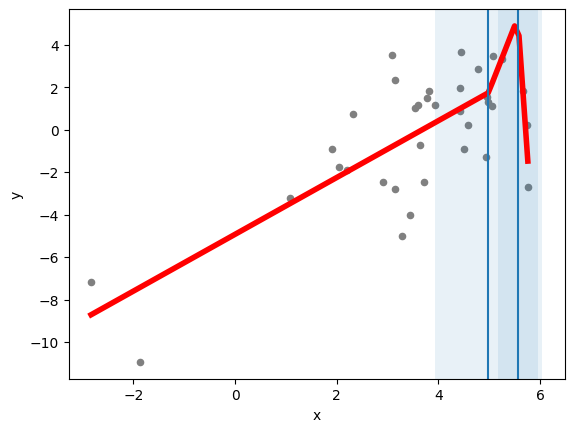

In [129]:
import matplotlib.pyplot as plt

# Plot the data, fit, breakpoints and confidence intervals
pw_fit.plot_data(color="grey", s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linewidth=4)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.close()

In [130]:
pw_results = pw_fit.get_results()
pw_estimates = pw_results["estimates"]


In [134]:
pd.DataFrame(pw_estimates)

,const,beta1,breakpoint1,beta2,breakpoint2,alpha1,alpha2,alpha3
estimate,-4.929992,4.766612,4.982873,-40.111014,5.560543,1.337819,6.104431,-34.006583
se,0.817221,13.854605,0.515616,30.855937,0.19075,0.224434,13.852787,27.571527
confidence_interval,"(-6.601396476831295, -3.258586962246647)","(-23.569236519831858, 33.102460724059924)","(3.928319920714418, 6.037425623136389)","(-103.21849050992256, 22.996462288867328)","(5.17041555238686, 5.9506705864561695)","(0.8788005163919526, 1.796837822952469)","(-22.227699234085947, 34.43656177765844)","(-90.39668798581849, 22.383522308335763)"
t_stat,-6.032629,0.344045,-,-1.299945,-,5.960863,0.440664,-1.233395
p_t,0.000001,-,-,-,-,0.000002,0.662723,0.227332


In [135]:
ms = piecewise_regression.ModelSelection(x.values, y.values, max_breakpoints=3)

Running fit with n_breakpoint = 0 . . 
Running fit with n_breakpoint = 1 . . 
Running fit with n_breakpoint = 2 . . 
Running fit with n_breakpoint = 3 . . 

                 Breakpoint Model Comparision Results                 
n_breakpoints            BIC    converged          RSS 
----------------------------------------------------------------------------------------------------
0                     62.203         True       168.92 
1                     61.651         True       135.71 
2                     68.528         True        134.8 
3                     72.133         True       121.95 

Min BIC (Bayesian Information Criterion) suggests best model


In [144]:
res=pd.DataFrame(ms.model_summaries)

In [146]:
res

,bic,n_breakpoints,estimates,converged,rss,davies
0,62.203395,0,"{'const': -4.646958702521585, 'alpha1': 1.2039...",True,168.919989,NaN
1,61.651428,1,"{'const': {'estimate': -4.949829578027288, 'se...",True,135.706157,0.337413
2,68.528411,2,"{'const': {'estimate': -5.037915331680858, 'se...",True,134.802997,0.337413
3,72.133177,3,"{'const': {'estimate': -18.30690200444264, 'se...",True,121.954129,0.337413


In [150]:
(res.estimates[1])

{'const': {'estimate': -4.949829578027288,
  'se': 0.7762826042141133,
  'confidence_interval': (-6.533068387525592, -3.366590768528983),
  't_stat': -6.376324229290641,
  'p_t': 4.224985824841451e-07},
 'beta1': {'estimate': -299.61432913661616,
  'se': 301.31849587975347,
  'confidence_interval': (-914.157453131314, 314.92879485808163),
  't_stat': -0.9943443009093694,
  'p_t': '-'},
 'breakpoint1': {'estimate': 5.740266870765907,
  'se': 0.014734485660251201,
  'confidence_interval': (5.710215689136089, 5.770318052395724),
  't_stat': '-',
  'p_t': '-'},
 'alpha1': {'estimate': 1.3549474755776563,
  'se': 0.20033704768727548,
  'confidence_interval': (0.9463573730080996, 1.763537578147213),
  't_stat': 6.763339538140336,
  'p_t': 1.4276271851379544e-07},
 'alpha2': {'estimate': -298.2593816610385,
  'se': 301.3184292808927,
  'confidence_interval': (-912.8023698264642, 316.28360650438725),
  't_stat': -0.9898477911651314,
  'p_t': 0.32991216639239274}}

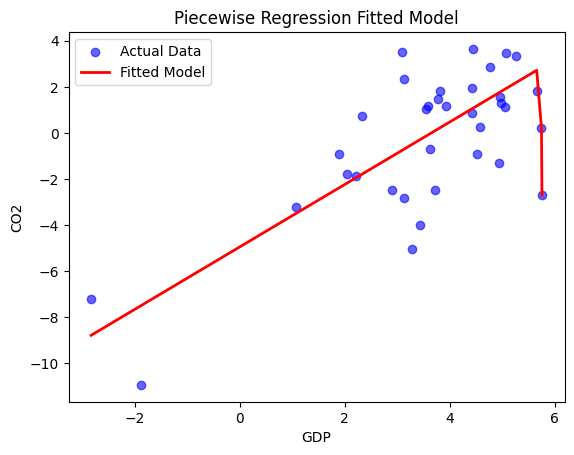

In [156]:
import numpy as np
import matplotlib.pyplot as plt

const = -4.949829578027288
beta1 = -299.61432913661616
alpha1 = 1.3549474755776563
alpha2 = -298.2593816610385
breakpoint1 = 5.740266870765907

def piecewise_model(x):
    if x <= breakpoint1:
        return const + alpha1 * x
    else:
        continuity = const + alpha1 * breakpoint1
        return continuity + alpha2 * (x - breakpoint1)

x_values = np.sort(x.values.flatten())  # Ensure x is sorted
fitted_values = np.array([piecewise_model(xi) for xi in x_values])

plt.scatter(x.values, y.values, color="blue", label="Actual Data", alpha=0.6)
plt.plot(x_values, fitted_values, color="red", label="Fitted Model", linewidth=2)

plt.xlabel("GDP")
plt.ylabel("CO2")
plt.title("Piecewise Regression Fitted Model")
plt.legend()

plt.show()


### A p-value of 0.33 suggests that the evidence for a breakpoint in the 1-breakpoint model is weak.
### Even though the model converged and has the lowest BIC, the high Davies p-value indicates that the improvement in fit might not be statistically significant.

## `Hence we conclude the relationship of GDP on CO2 is best explained through the quadratic relationship`